In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Download the MNIST dataset from 
#https://www.kaggle.com/c/digit-recognizer/data
d0 = pd.read_csv('train.csv')

In [3]:
#save label as l
l = d0['label']
d = d0.drop('label', axis = 1)

In [6]:
#Pick first 15k points
labels = l.head(15000)
data = d.head(15000)

In [16]:
print(labels.shape)
print(data.shape)

(15000,)
(15000, 784)


In [9]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)


In [10]:
print(standardized_data.shape)

(15000, 784)


In [11]:
sample_data = standardized_data

In [12]:
#Initializing tSNE
from sklearn.manifold import TSNE
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

In [14]:
#Reducing the dimension of the data from 784 to 2
model = TSNE(n_components=2, random_state = 0)
#fitting the data on tSNE
tsne_data = model.fit_transform(data_1000)


In [21]:
#Vertical stacking the label column and tSNE reduced data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T

In [23]:
#converting the matrix into a pandas dataframe
tsne_df = pd.DataFrame(data = tsne_data, columns=("Dim_1", "Dim_2", "labels"))


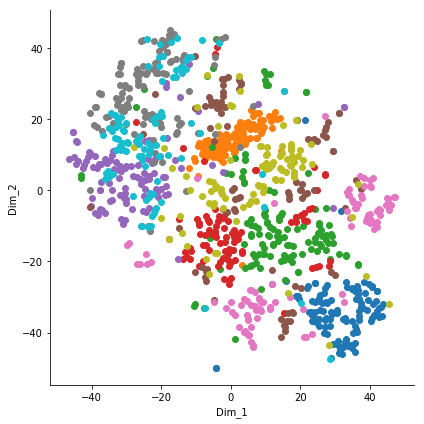

In [28]:
import seaborn as sns 
sns.FacetGrid(tsne_df, hue = 'labels', size = 6).map(plt.scatter,'Dim_1','Dim_2')
plt.show()

The 784 dimension data has been reduced to 2 dimension.